# AML Project

## Finalize cleaning and EDA
* target encoding
* Box Cox transformation for label
* normalize values
* sampling (random split)
* google drive

## Connect google drive

In [1]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
final_spotify_data_cleaned = 'https://drive.google.com/file/d/1sfl8emc1NjjVd9TpuTHFdpUjJ-rCG_Jn/view?usp=share_link'

# link for fina_spotify_data
# link = 'https://drive.google.com/file/d/1djViZyjX3-kNZbsY_nf-xovKDioIGpBU/view?usp=share_link'  
 
# to get the id part of the file
id = final_spotify_data_cleaned.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('final_spotify_data_cleaned.csv') 

## Load a dataset

In [4]:
import pandas as pd 

df = pd.read_csv('final_spotify_data_cleaned.csv')
print(df.shape)
df.head()

(676345, 18)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,total_available_markets,release_date,topartist_id,key,mode,time_signature,artist_genre
0,100,0.72100,0.585,242014.0,0.436,0.000013,0.1050,-8.761,0.0601,143.874,0.132,1.0,722.0,1McMsnEElThX1knmY4oliG,10.0,1.0,4.0,pop
1,96,0.02120,0.680,215627.0,0.826,0.000012,0.5430,-5.487,0.0309,118.051,0.644,184.0,1016.0,1Xyo4u8uXC1ZmMpatF05PJ,0.0,1.0,4.0,canadian contemporary r&b
2,96,0.00146,0.514,200040.0,0.730,0.000095,0.0897,-5.934,0.0598,171.005,0.334,184.0,1016.0,1Xyo4u8uXC1ZmMpatF05PJ,1.0,1.0,4.0,canadian contemporary r&b
3,95,0.22100,0.700,140526.0,0.722,0.000000,0.2720,-3.558,0.0369,90.989,0.756,0.0,890.0,6fWVd57NKTalqvmjRd2t8Z,7.0,0.0,4.0,cali rap
4,94,0.21300,0.662,161385.0,0.413,0.000000,0.1340,-7.357,0.0299,93.005,0.467,0.0,785.0,2tIP7SsRs7vjIcLrU85W8J,0.0,1.0,4.0,australian hip hop


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676345 entries, 0 to 676344
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   popularity               676345 non-null  int64  
 1   acousticness             676345 non-null  float64
 2   danceability             676345 non-null  float64
 3   duration_ms              676345 non-null  float64
 4   energy                   676345 non-null  float64
 5   instrumentalness         676345 non-null  float64
 6   liveness                 676345 non-null  float64
 7   loudness                 676345 non-null  float64
 8   speechiness              676345 non-null  float64
 9   tempo                    676345 non-null  float64
 10  valence                  676345 non-null  float64
 11  total_available_markets  676345 non-null  float64
 12  release_date             676345 non-null  float64
 13  topartist_id             676345 non-null  object 
 14  key 

In [6]:
df.isnull().sum()

popularity                      0
acousticness                    0
danceability                    0
duration_ms                     0
energy                          0
instrumentalness                0
liveness                        0
loudness                        0
speechiness                     0
tempo                           0
valence                         0
total_available_markets         0
release_date                    0
topartist_id                    0
key                             0
mode                            0
time_signature                  0
artist_genre               164869
dtype: int64

## Split a dataset

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop('popularity', axis=1)
y = df['popularity']
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25)

print("{:<7}: {}".format('X_train', X_train.shape))
print("{:<7}: {}".format('X_val', X_val.shape))
print("{:<7}: {}".format('X_test', X_test.shape))

X_train: (405807, 17)
X_val  : (135269, 17)
X_test : (135269, 17)


## Target Encoding

In [8]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.2 MB/s eta 0:00:00


In [19]:
from category_encoders import TargetEncoder

features_te = ['topartist_id', 'artist_genre']

te = TargetEncoder(cols=features_te, handle_missing='return_nan').fit(X_train, y_train)

X_train = te.transform(X_train)
X_val = te.transform(X_val)
X_test = te.transform(X_test)

X_train.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,total_available_markets,release_date,topartist_id,key,mode,time_signature,artist_genre
121069,0.9180,0.649,102539.0,0.196,0.911,0.1330,-26.687,0.0766,134.947,0.9630,0.0,974.0,27.884616,10.0,0.0,4.0,NaN
483368,0.4710,0.694,170348.0,0.670,0.000,0.1830,-5.624,0.1050,125.509,0.4430,184.0,465.0,36.463290,2.0,0.0,4.0,42.448623
581485,0.8870,0.213,223240.0,0.138,0.878,0.3300,-15.503,0.0394,64.935,0.0367,167.0,1478.0,20.228811,5.0,1.0,4.0,16.267928
10330,0.3220,0.420,344013.0,0.466,0.133,0.0839,-8.670,0.0323,78.015,0.1070,184.0,666.0,54.376151,0.0,1.0,1.0,50.071313
410957,0.0502,0.463,125414.0,0.536,0.000,0.1450,-7.917,0.3590,86.222,0.2210,185.0,751.0,22.944764,2.0,1.0,4.0,NaN


## KNN to handle missing values

In [20]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5).fit(X_train.sample(frac=0.1))
X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [21]:
# Confirm null values
X_train.isnull().sum()

acousticness               0
danceability               0
duration_ms                0
energy                     0
instrumentalness           0
liveness                   0
loudness                   0
speechiness                0
tempo                      0
valence                    0
total_available_markets    0
release_date               0
topartist_id               0
key                        0
mode                       0
time_signature             0
artist_genre               0
dtype: int64

## Check correlated features

<Axes: >

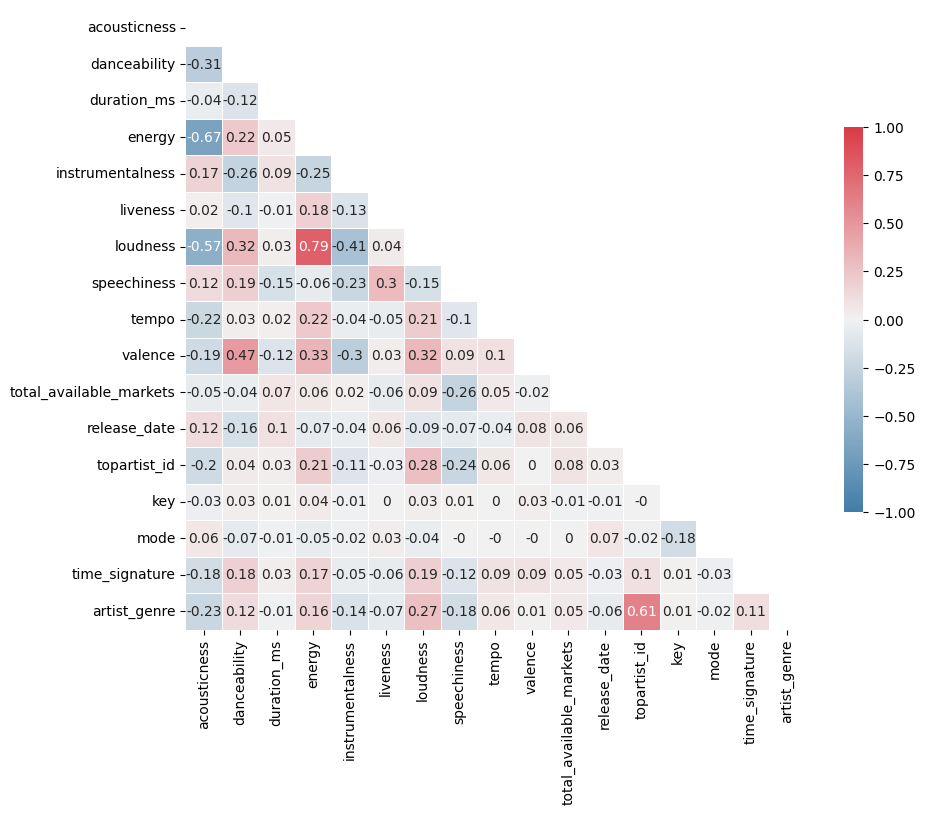

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = X_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(240, 10, as_cmap=True, n=20)
sns.heatmap(corr.round(2), mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

## MinMaxScaler to normalize values 

In [26]:
from sklearn.preprocessing import MinMaxScaler

col_names = X_train.columns
features = X_train[col_names]

scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,total_available_markets,release_date,topartist_id,key,mode,time_signature,artist_genre
0,0.921687,0.652918,0.016693,0.196,0.911,0.1330,0.510270,0.078807,0.540199,0.9630,0.000000,0.005624,0.383072,0.909091,0.0,0.8,0.496271
1,0.472892,0.698189,0.027952,0.670,0.000,0.1830,0.832902,0.108025,0.502418,0.4430,0.994595,0.002874,0.500924,0.181818,0.0,0.8,0.704290
2,0.890562,0.214286,0.036735,0.138,0.878,0.3300,0.681581,0.040535,0.259938,0.0367,0.902703,0.008347,0.277899,0.454545,1.0,0.8,0.269756
3,0.323293,0.422535,0.056788,0.466,0.133,0.0839,0.786245,0.033230,0.312297,0.1070,0.994595,0.003960,0.747007,0.000000,1.0,0.2,0.830807
4,0.050402,0.465795,0.020492,0.536,0.000,0.1450,0.797779,0.369342,0.345150,0.2210,1.000000,0.004420,0.315210,0.181818,1.0,0.8,0.506325


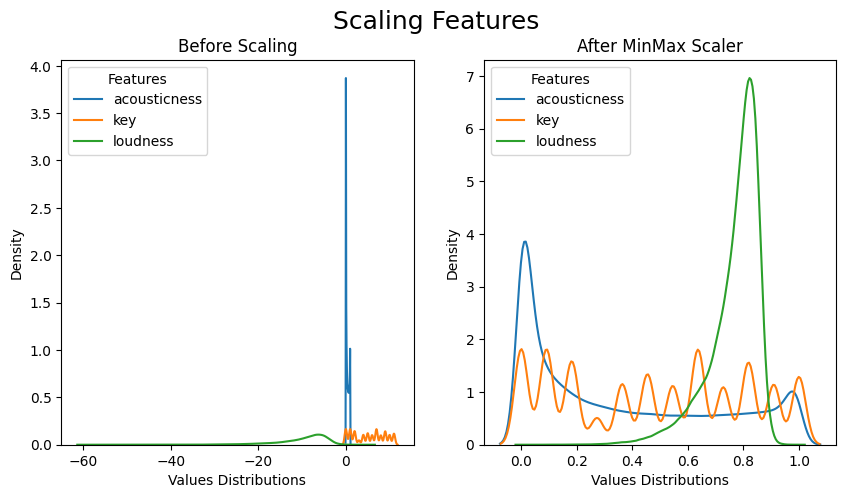

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

fig.suptitle("Scaling Features", fontsize=18)

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['acousticness'], ax=ax1)
#sns.kdeplot(X_train['danceability'], ax=ax1)
sns.kdeplot(X_train['key'], ax=ax1)
sns.kdeplot(X_train['loudness'], ax=ax1)
ax1.set_ylabel("Density")
ax1.set_xlabel("Values Distributions")
ax1.legend(title="Features", labels=['acousticness', 'key', 'loudness'])

ax2.set_title('After MinMax Scaler')
sns.kdeplot(scaled_features['acousticness'], ax=ax2)
#sns.kdeplot(scaled_features['danceability'], ax=ax2)
sns.kdeplot(scaled_features['key'], ax=ax2)
sns.kdeplot(scaled_features['loudness'], ax=ax2)
ax2.set_ylabel("Density")
ax2.set_xlabel("Values Distributions")
ax2.legend(title="Features", labels=['acousticness', 'key', 'loudness'])

plt.show()

## Handle imbalanced dataset for regression model

<ipython-input-59-6f16a5f7694c>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train[y_train>0], hist = False, kde = True,
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-59-6f16a5f7694c>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) o

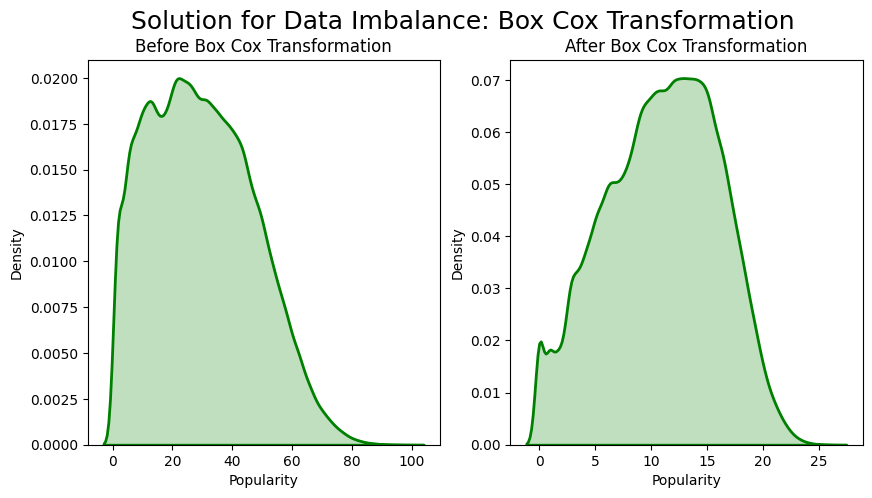

Lambda value used for Transformation: 0.6188146642701864


In [59]:
from scipy import stats
#y_bc, lambda_bc = stats.boxcox(y[y>0])

fitted_data, fitted_lambda = stats.boxcox(y_train[y_train>0])
 
# creating axes to draw plots
#fig, ax = plt.subplots(1, 2)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

fig.suptitle("Solution for Data Imbalance: Box Cox Transformation", fontsize=18)

# plotting the original data(non-normal) and
# fitted data (normal)
ax1.set_title('Before Box Cox Transformation')
sns.distplot(y_train[y_train>0], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax1) #[0])
ax1.set_ylabel("Density")
ax1.set_xlabel("Popularity")

ax2.set_title('After Box Cox Transformation') 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax2) #[1])
ax2.set_ylabel("Density")
ax2.set_xlabel("Popularity")

plt.show()

print(f"Lambda value used for Transformation: {fitted_lambda}")

array([[<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'total_available_markets'}>,
        <Axes: title={'center': 'release_date'}>,
        <Axes: title={'center': 'topartist_id'}>],
       [<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'artist_genre'}>]], dtype=object)

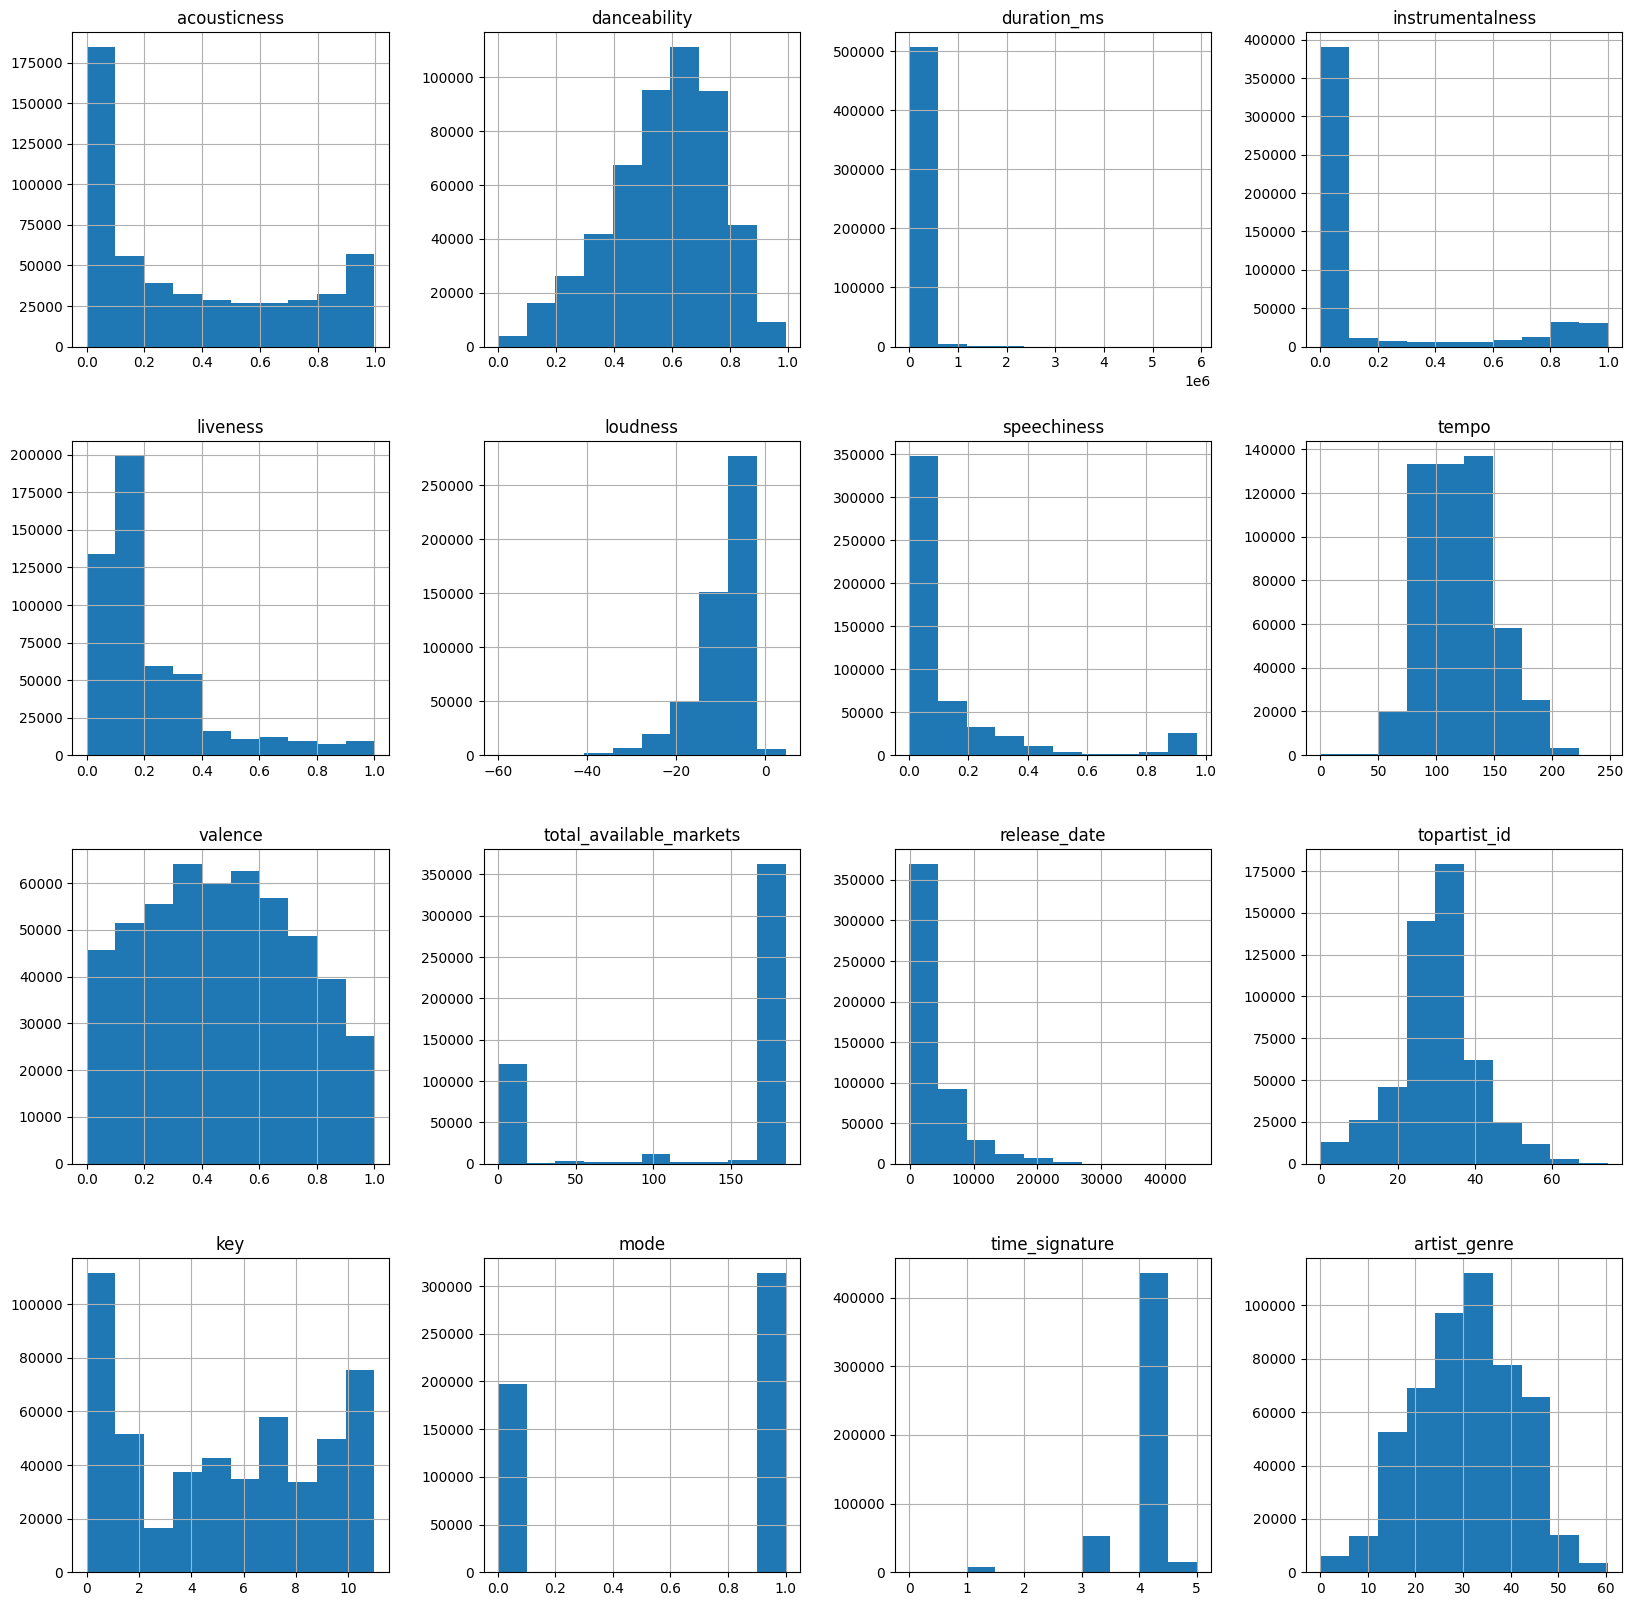

In [48]:
X[X.dtypes[(X.dtypes=="float64")|(X.dtypes=="int64")].index.values].hist(figsize=[20,20])

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

col_names = X.columns
features = X[col_names]

#scaler = StandardScaler().fit(features.values)
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,acousticness,danceability,duration_ms,instrumentalness,liveness,loudness,speechiness,tempo,valence,total_available_markets,release_date,topartist_id,key,mode,time_signature,artist_genre
0,0.723896,0.589718,0.040668,0.000013,0.1050,0.794009,0.061959,0.580521,0.132,0.005405,0.017536,0.678621,0.909091,1.0,0.8,0.900922
1,0.021285,0.685484,0.036197,0.000012,0.5430,0.844744,0.031856,0.476327,0.644,0.994595,0.024071,0.802819,0.000000,1.0,0.8,0.771959
2,0.001466,0.518145,0.033556,0.000095,0.0897,0.837817,0.061649,0.689993,0.334,0.994595,0.024071,0.802819,0.090909,1.0,0.8,0.771959
3,0.221888,0.705645,0.023471,0.000000,0.2720,0.874636,0.038041,0.367134,0.756,0.000000,0.021270,0.649422,0.636364,0.0,0.8,0.579316
4,0.213855,0.667339,0.027006,0.000000,0.1340,0.815766,0.030825,0.375268,0.467,0.000000,0.018937,0.808667,0.000000,1.0,0.8,0.836441


array([[<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'total_available_markets'}>,
        <Axes: title={'center': 'release_date'}>,
        <Axes: title={'center': 'topartist_id'}>],
       [<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'artist_genre'}>]], dtype=object)

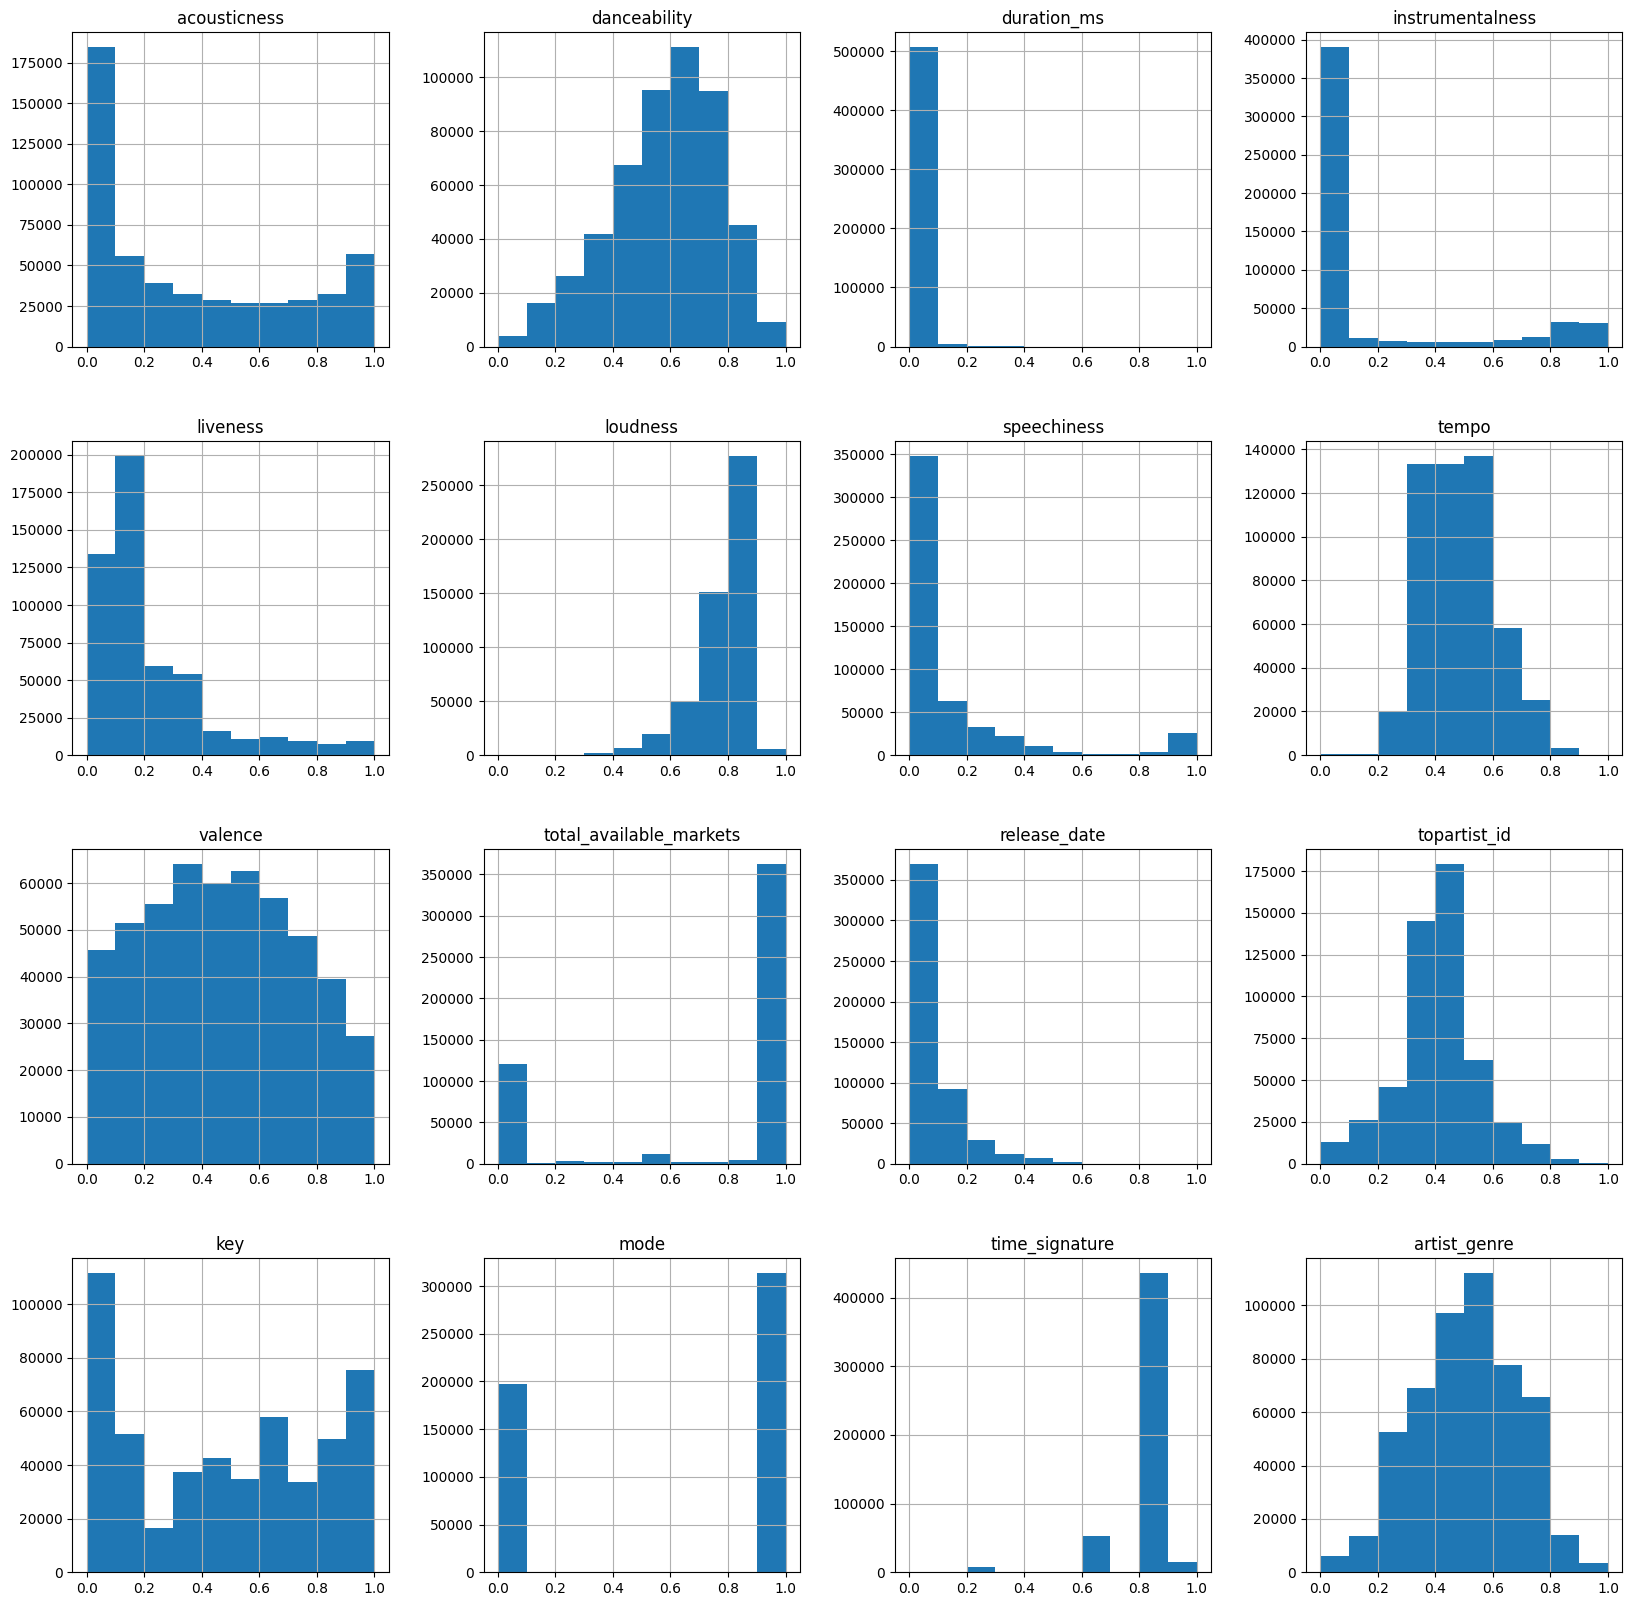

In [61]:
scaled_features[scaled_features.dtypes[(scaled_features.dtypes=="float64")|(scaled_features.dtypes=="int64")].index.values].hist(figsize=[20,20])